In [23]:
import os
import csv
import string
import matplotlib.pyplot as plt

from os import path
from wordcloud import WordCloud

In [24]:
actors = [
    'Dwayne Johnson',
    'Chris Hemsworth',
    'Robert Downey Jr.',
    'Akshay Kumar',
    'Jackie Chan',
    'Bradley Cooper',
    'Adam Sandler',
    'Scarlett Johansson',
    'Sofia Vergara',
    'Chris Evans'
]

In [25]:
def get_file_path_by_actor(actor: str):
    path = 'movie_descriptions/'
    
    file_name = actor.replace(' ', '_')
    file_name = file_name.replace('.', '')
    file_name = path + file_name.lower() + '.csv'
    
    return file_name

In [26]:
def get_stopwords(file_name='stopwords.txt'):
    return open(file_name).read().split()

In [27]:
def remove_stopwords(text: str):
    stopwords = get_stopwords()
    
    querywords = text.split()
    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    
    return result

In [28]:
def get_preprocessed_text(text: str):
    
    # remove one letters and extra spaces
    stripped_row = ' '.join(text.split())
    remove_letters = ' '.join([w for w in stripped_row.split() if len(w)>1])
    
    # remove punctuations and digits
    remove_puctuation = remove_letters.translate(str.maketrans('', '', string.punctuation))
    remove_digits = remove_puctuation.translate(str.maketrans('', '', string.digits))
    
    # remove stopwords
    result = remove_stopwords(remove_digits)
    
    return remove_digits

In [29]:
def generate_wordcloud(text: str):
    wordcloud = WordCloud(max_font_size=40).generate(text)
    return wordcloud

In [30]:
def generate_wordclouds(actors: list):
    wordclouds = {}
    
    for actor in actors:
        
        file_path = get_file_path_by_actor(actors[0])
        descriptions = []

        with open(file_path, "r") as f:
            reader = csv.reader(f)
            for row in reader:
                clear_row = get_preprocessed_text(' '.join(row))
                descriptions.append(clear_row)
                
        description_total = ' '.join(descriptions)
        wordcloud = generate_wordcloud(description_total)
        wordclouds[actor] = wordcloud
    
    return wordclouds

In [31]:
def display_images(wordclouds: dict):
    for actor, cloud in wordclouds.items():
        print(actor)
        plt.figure()
        plt.imshow(cloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

Dwayne Johnson


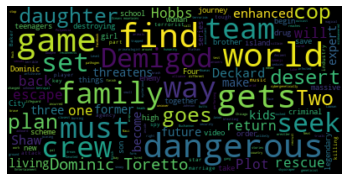

Chris Hemsworth


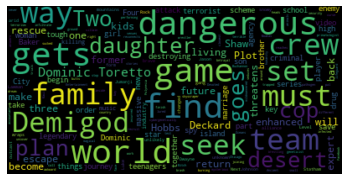

Robert Downey Jr.


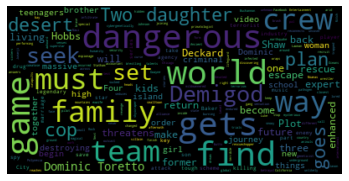

Akshay Kumar


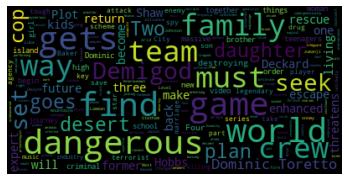

Jackie Chan


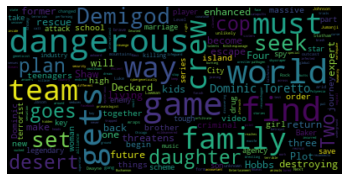

Bradley Cooper


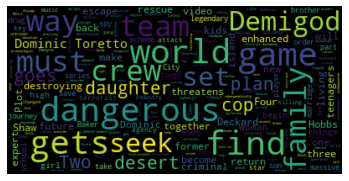

Adam Sandler


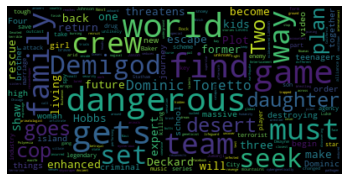

Scarlett Johansson


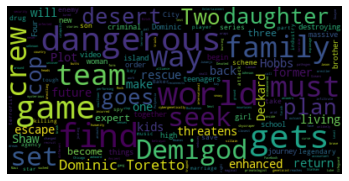

Sofia Vergara


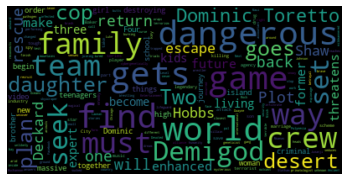

Chris Evans


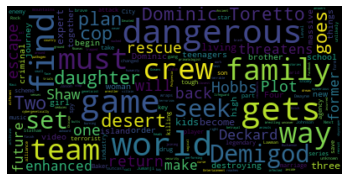

In [34]:
def generate_wordclouds(actors: list):
    wordclouds = {}
    
    for actor in actors:
        
        file_path = get_file_path_by_actor(actors[0])
        descriptions = []

        with open(file_path, "r") as f:
            reader = csv.reader(f)
            for row in reader:
                clear_row = get_preprocessed_text(' '.join(row))
                descriptions.append(clear_row)
                
        description_total = ' '.join(descriptions)
        wordcloud = generate_wordcloud(description_total)
        wordclouds[actor] = wordcloud
    
    return wordclouds